### Elastic Net
Elastic net is a popular type of regularized linear regression that combines two popular penalties, specifically the L1 and L2 penalty functions.
The coefficients of the model are found via an optimization process that seeks to minimize the sum squared error between the predictions (yhat) and the expected target values (y).
A problem with linear regression is that estimated coefficients of the model can become large, making the model sensitive to inputs and possibly unstable. This is particularly true for problems with few observations (samples) or more samples (n) than input predictors (p) or variables (so-called p >> n problems).

One approach to addressing the stability of regression models is to change the loss function to include additional costs for a model that has large coefficients. Linear regression models that use these modified loss functions during training are referred to collectively as penalized linear regression.
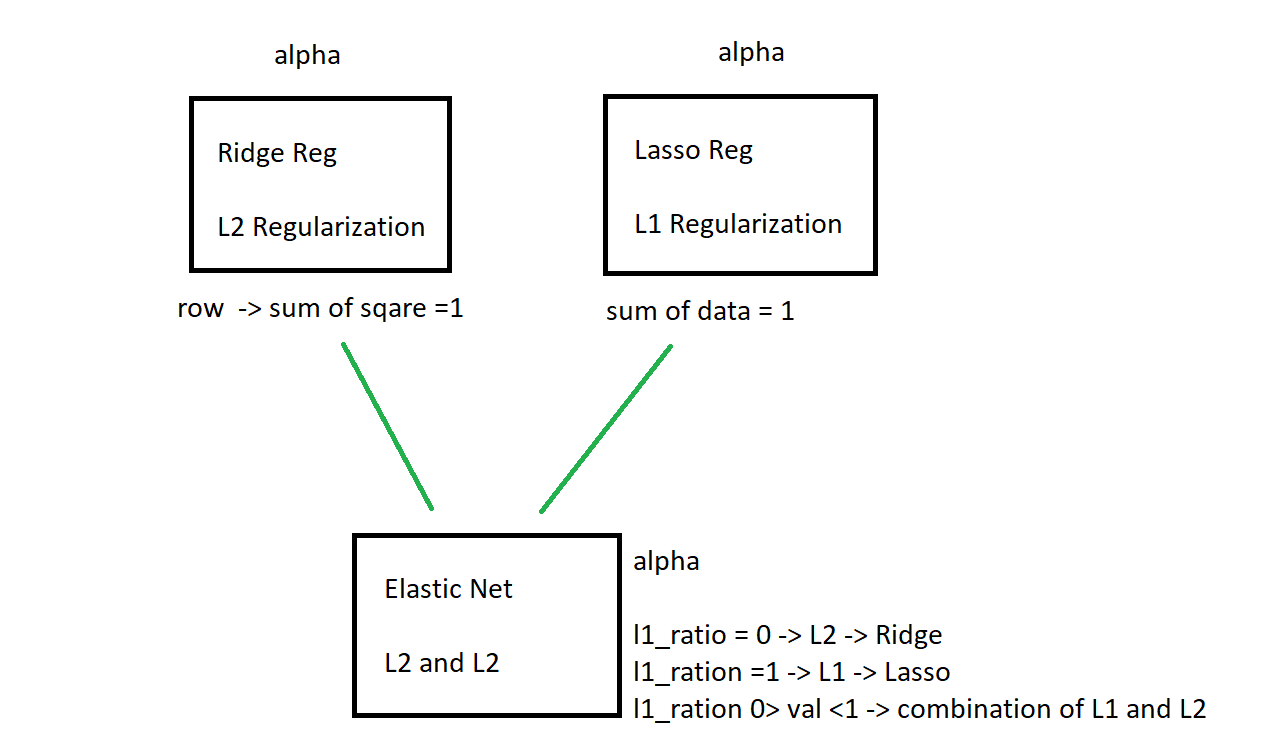

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [4]:
df=pd.read_csv("../Data/Housing.csv")

In [5]:
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [6]:
x=df.drop(columns="MEDV")
y=df["MEDV"]

In [7]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [12]:
alpha=[0.0001,0.001,0.01,0.1,0.3,0.5,1,10]

In [25]:
scores={}
for i in alpha:
    model=ElasticNet(alpha=i)
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    mse=mean_squared_error(ytest,ypred)
    rmse=np.sqrt(mse)
    mae=mean_absolute_error(ytest,ypred)
    scores[i]=model.score(xtest,ytest)
    print(" For Alpha = {} | R-square :{} MSE :{} RMSE :{} MAE:{} ".format(i,model.score(xtest,ytest),mse,rmse,mae))

 For Alpha = 0.0001 | R-square :0.6574562214329336 MSE :9727671263.19448 RMSE :98628.95752868161 MAE:72451.41947724935 
 For Alpha = 0.001 | R-square :0.6574022488689464 MSE :9729203993.877533 RMSE :98636.72740859528 MAE:72455.18851975753 
 For Alpha = 0.01 | R-square :0.6568566473595847 MSE :9744698165.588886 RMSE :98715.23775785016 MAE:72500.77013104095 
 For Alpha = 0.1 | R-square :0.6511189787737206 MSE :9907638371.520887 RMSE :99537.12057077444 MAE:73037.98847541994 
 For Alpha = 0.3 | R-square :0.6391911672238 MSE :10246368300.093344 RMSE :101224.3463801735 MAE:74366.49442538632 
 For Alpha = 0.5 | R-square :0.6297111757411558 MSE :10515584226.614664 RMSE :102545.52270389315 MAE:75256.58490648311 
 For Alpha = 1 | R-square :0.6138840942812183 MSE :10965046908.850851 RMSE :104714.11991155181 MAE:76480.16848105645 
 For Alpha = 10 | R-square :0.5599326915713965 MSE :12497176646.967262 RMSE :111790.77174332085 MAE:80162.42010373622 


In [29]:
scores

{0.0001: 0.6574562214329336,
 0.001: 0.6574022488689464,
 0.01: 0.6568566473595847,
 0.1: 0.6511189787737206,
 0.3: 0.6391911672238,
 0.5: 0.6297111757411558,
 1: 0.6138840942812183,
 10: 0.5599326915713965}

In [33]:
#get the max score and its key
max(scores, key= lambda x: scores[x])

0.0001

### Function for getting best alpha 

In [35]:
def get_best_alpha(alpha):
    for i in alpha:
        model=ElasticNet(alpha=i)
        model.fit(xtrain,ytrain)
        ypred=model.predict(xtest)
        mse=mean_squared_error(ytest,ypred)
        rmse=np.sqrt(mse)
        mae=mean_absolute_error(ytest,ypred)
        scores[i]=model.score(xtest,ytest)
        print(" For Alpha = {} | R-square :{} MSE :{} RMSE :{} MAE:{} ".format(i,model.score(xtest,ytest),mse,rmse,mae))
    return max(scores, key= lambda x: scores[x])

In [37]:
print("Best Alpha is :",get_best_alpha(alpha))

 For Alpha = 0.0001 | R-square :0.6574562214329336 MSE :9727671263.19448 RMSE :98628.95752868161 MAE:72451.41947724935 
 For Alpha = 0.001 | R-square :0.6574022488689464 MSE :9729203993.877533 RMSE :98636.72740859528 MAE:72455.18851975753 
 For Alpha = 0.01 | R-square :0.6568566473595847 MSE :9744698165.588886 RMSE :98715.23775785016 MAE:72500.77013104095 
 For Alpha = 0.1 | R-square :0.6511189787737206 MSE :9907638371.520887 RMSE :99537.12057077444 MAE:73037.98847541994 
 For Alpha = 0.3 | R-square :0.6391911672238 MSE :10246368300.093344 RMSE :101224.3463801735 MAE:74366.49442538632 
 For Alpha = 0.5 | R-square :0.6297111757411558 MSE :10515584226.614664 RMSE :102545.52270389315 MAE:75256.58490648311 
 For Alpha = 1 | R-square :0.6138840942812183 MSE :10965046908.850851 RMSE :104714.11991155181 MAE:76480.16848105645 
 For Alpha = 10 | R-square :0.5599326915713965 MSE :12497176646.967262 RMSE :111790.77174332085 MAE:80162.42010373622 
Best Alpha is : 0.0001


### Elastic Net Cross Validation

#### Cross Validation
Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called overfitting. To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set X_test, y_test. Note that the word “experiment” is not intended to denote academic use only, because even in commercial settings machine learning usually starts out experimentally. Here is a flowchart of typical cross validation workflow in model training. 
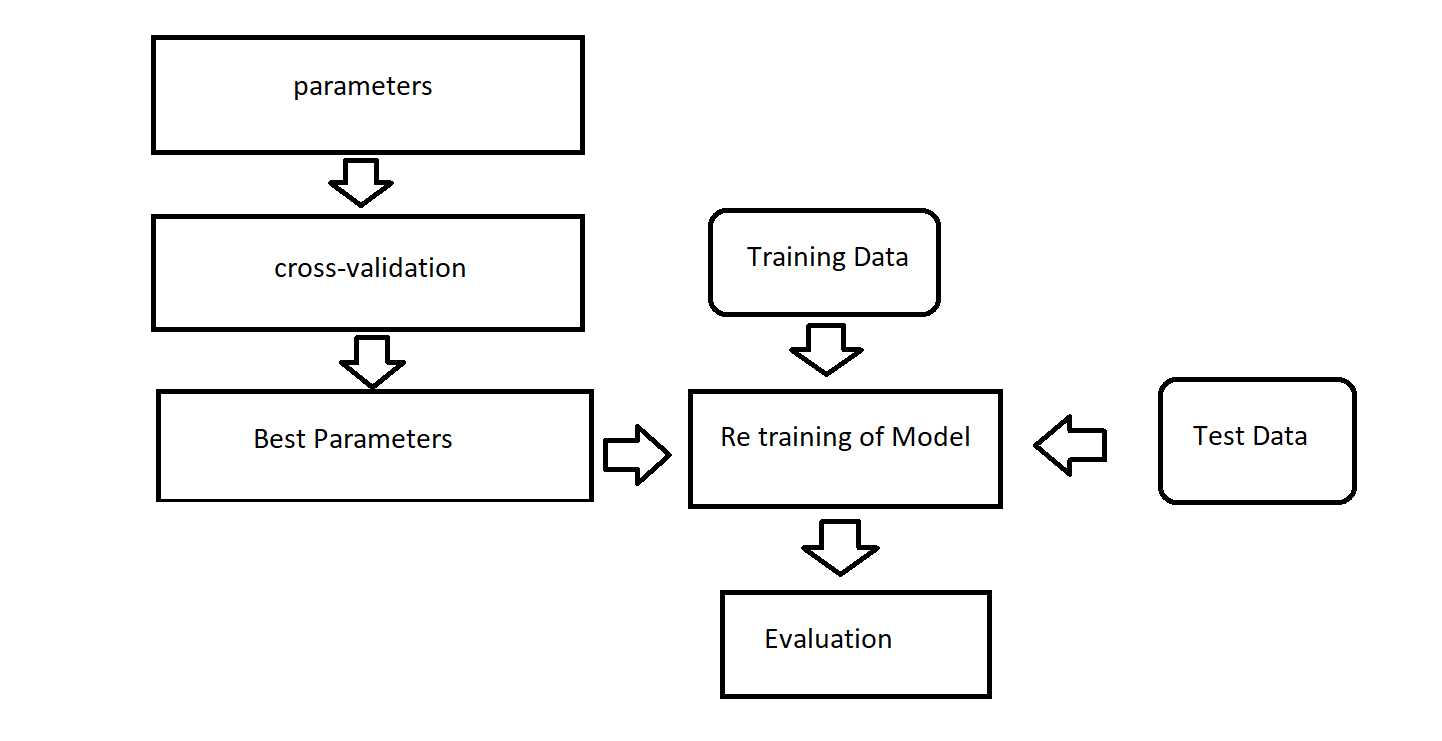

#### K-fold CV
 In the basic approach, called k-fold CV, the training set is split into k smaller sets (other approaches are described below, but generally follow the same principles). The following procedure is followed for each of the k “folds”:

        A model is trained using k-1 of the folds as training data;
        the resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy).

The performance measure reported by k-fold cross-validation is then the average of the values computed in the loop. This approach can be computationally expensive, but does not waste too much data (as is the case when fixing an arbitrary validation set), which is a major advantage in problems such as inverse inference where the number of samples is very small.
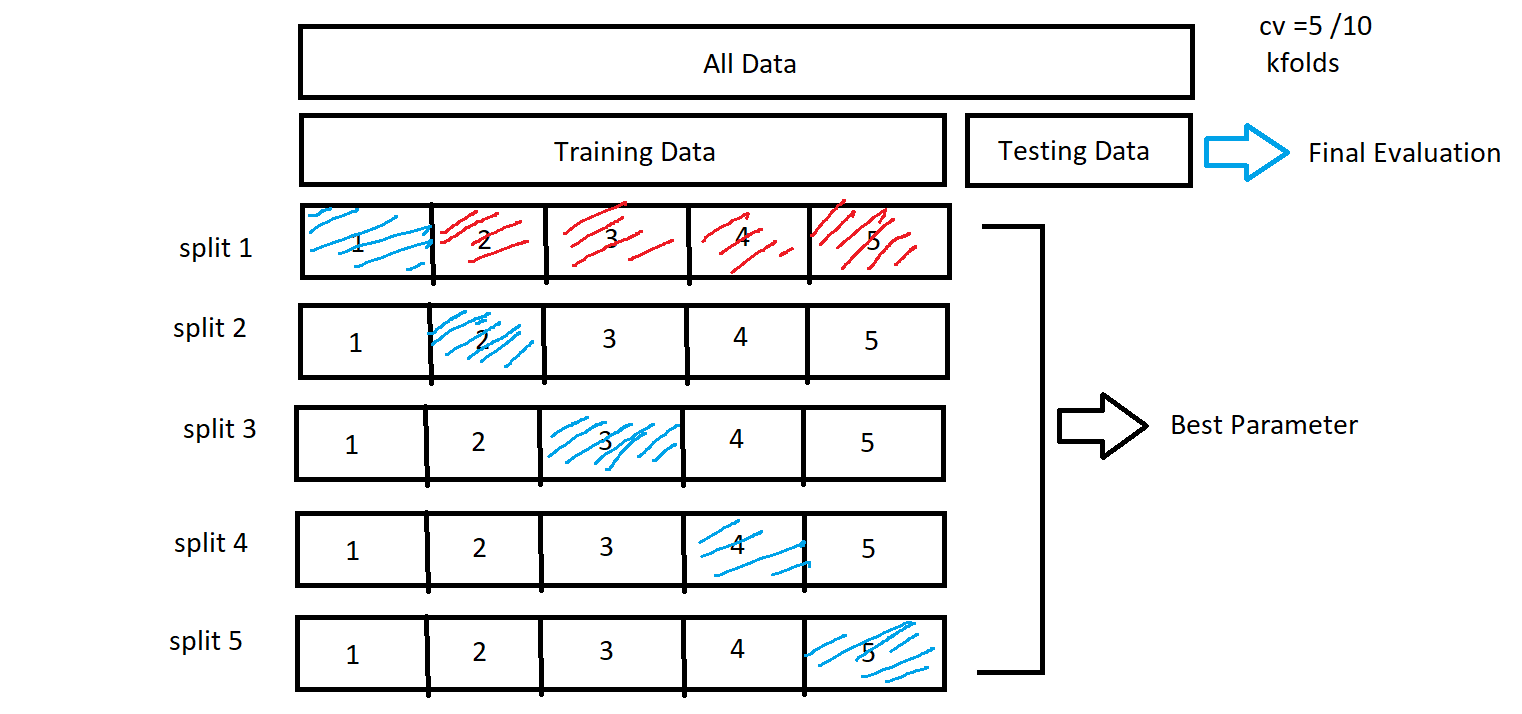

In [16]:
from sklearn.linear_model import ElasticNetCV

In [17]:
model= ElasticNetCV(alphas=alpha,cv=5)
model.fit(xtrain,ytrain)

ElasticNetCV(alphas=[0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 1, 10], cv=5)

In [18]:
model.alpha_

0.01

In [19]:
model.intercept_

461015.37977304717

In [20]:
ypred=model.predict(xtest)

In [21]:
model.score(xtest,ytest)

0.6568566473595847

In [23]:
mean_squared_error(ytest,ypred)

9744698165.588886

In [24]:
mean_absolute_error(ytest,ypred)

72500.77013104095